# TUGAS

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:
    - Jumlah cluster yang terbentuk.
    - Banyaknya noise.
    - Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).
4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [ ]:
# TUGAS - Clustering Dataset Iris dengan HDBSCAN

# Import pustaka yang diperlukan
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import pandas as pd

# 1. Load dataset Iris
print("=== LOADING DATASET IRIS ===")
iris = load_iris()
X_iris = iris.data
y_true = iris.target

print(f"Ukuran dataset: {X_iris.shape}")
print(f"Jumlah fitur: {X_iris.shape[1]}")
print(f"Jumlah sampel: {X_iris.shape[0]}")
print(f"Jumlah kelas asli: {len(set(y_true))}")
print(f"Nama fitur: {iris.feature_names}")
print(f"Nama kelas: {iris.target_names}")

# Tampilkan beberapa data pertama
df_iris = pd.DataFrame(X_iris, columns=iris.feature_names)
df_iris['true_label'] = y_true
print("\nBeberapa data pertama:")
print(df_iris.head())

=== LOADING DATASET IRIS ===
Ukuran dataset: (150, 4)
Jumlah fitur: 4
Jumlah sampel: 150
Jumlah kelas asli: 3
Nama fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nama kelas: ['setosa' 'versicolor' 'virginica']

Beberapa data pertama:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   true_label  
0           0  
1           0  
2           0  
3           0  
4           0  


In [ ]:
# 2. Clustering dengan HDBSCAN
print("\n=== CLUSTERING DENGAN HDBSCAN ===")

# Terapkan HDBSCAN dengan beberapa parameter yang berbeda
hdb_iris = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3)
cluster_labels = hdb_iris.fit_predict(X_iris)

print(f"Jumlah cluster yang terbentuk: {len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)}")
print(f"Jumlah noise points: {list(cluster_labels).count(-1)}")
print(f"Distribusi cluster:")

# Hitung distribusi untuk setiap cluster
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"  Noise: {count} points")
    else:
        print(f"  Cluster {label}: {count} points")

# Hitung probability untuk setiap point
probabilities = hdb_iris.probabilities_
print(f"\nRata-rata probability: {np.mean(probabilities):.3f}")
print(f"Minimum probability: {np.min(probabilities):.3f}")
print(f"Maximum probability: {np.max(probabilities):.3f}")


=== CLUSTERING DENGAN HDBSCAN ===
Jumlah cluster yang terbentuk: 2
Jumlah noise points: 0
Distribusi cluster:
  Cluster 0: 50 points
  Cluster 1: 100 points

Rata-rata probability: 0.886
Minimum probability: 0.319
Maximum probability: 1.000


c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



=== VISUALISASI HASIL CLUSTERING ===
Variance explained oleh 2 komponen PCA: 0.978


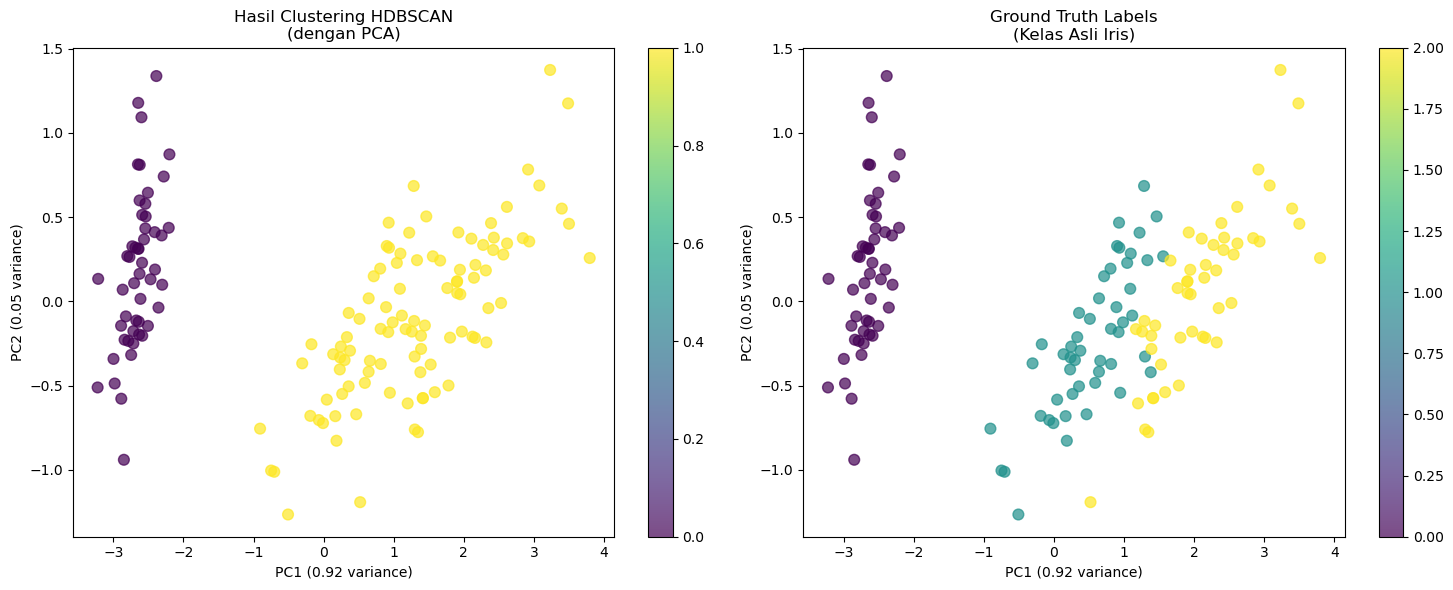

In [ ]:
# 3. Visualisasi dengan PCA (karena Iris memiliki 4 dimensi)
print("\n=== VISUALISASI HASIL CLUSTERING ===")

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris)

print(f"Variance explained oleh 2 komponen PCA: {pca.explained_variance_ratio_.sum():.3f}")

# Plot hasil clustering HDBSCAN
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Hasil clustering HDBSCAN
scatter1 = axes[0].scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=cluster_labels, 
                          cmap='viridis', alpha=0.7, s=60)
axes[0].set_title('Hasil Clustering HDBSCAN\n(dengan PCA)')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
plt.colorbar(scatter1, ax=axes[0])

# Plot 2: Ground truth labels
scatter2 = axes[1].scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_true, 
                          cmap='viridis', alpha=0.7, s=60)
axes[1].set_title('Ground Truth Labels\n(Kelas Asli Iris)')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
plt.colorbar(scatter2, ax=axes[1])

plt.tight_layout()
plt.show()

In [ ]:
# 3. Evaluasi dan Perbandingan dengan Label Asli
print("\n=== EVALUASI HASIL CLUSTERING ===")

# Hitung metrik evaluasi
# Filter noise points untuk evaluasi (karena tidak ada ground truth untuk noise)
non_noise_mask = cluster_labels != -1
X_filtered = X_iris[non_noise_mask]
y_true_filtered = y_true[non_noise_mask]
cluster_labels_filtered = cluster_labels[non_noise_mask]

if len(set(cluster_labels_filtered)) > 1:  # Pastikan ada lebih dari 1 cluster
    # Silhouette Score
    sil_score_iris = silhouette_score(X_iris, cluster_labels)
    print(f"Silhouette Score (termasuk noise): {sil_score_iris:.3f}")
    
    if len(cluster_labels_filtered) > 0:
        sil_score_filtered = silhouette_score(X_filtered, cluster_labels_filtered)
        print(f"Silhouette Score (tanpa noise): {sil_score_filtered:.3f}")
    
    # Davies-Bouldin Index
    dbi_score_iris = davies_bouldin_score(X_iris[non_noise_mask], cluster_labels[non_noise_mask])
    print(f"Davies-Bouldin Index: {dbi_score_iris:.3f}")

# Metrik perbandingan dengan ground truth
if len(cluster_labels_filtered) > 0:
    ari_score = adjusted_rand_score(y_true_filtered, cluster_labels_filtered)
    nmi_score = normalized_mutual_info_score(y_true_filtered, cluster_labels_filtered)
    
    print(f"\n=== PERBANDINGAN DENGAN GROUND TRUTH ===")
    print(f"Adjusted Rand Index: {ari_score:.3f}")
    print(f"Normalized Mutual Information: {nmi_score:.3f}")

# Buat confusion matrix sederhana
print(f"\n=== ANALISIS DISTRIBUSI CLUSTER ===")
print("Tabel perbandingan cluster HDBSCAN vs Ground Truth:")

# Buat crosstab
df_comparison = pd.DataFrame({
    'True_Label': y_true,
    'HDBSCAN_Label': cluster_labels
})

crosstab = pd.crosstab(df_comparison['True_Label'], df_comparison['HDBSCAN_Label'], margins=True)
print(crosstab)

# Analisis per kelas
print(f"\n=== ANALISIS PER KELAS ===")
for true_class in range(3):  # Iris memiliki 3 kelas
    mask = y_true == true_class
    cluster_dist = cluster_labels[mask]
    unique_clusters, counts = np.unique(cluster_dist, return_counts=True)
    
    print(f"\nKelas {iris.target_names[true_class]}:")
    for cluster, count in zip(unique_clusters, counts):
        if cluster == -1:
            print(f"  Dianggap noise: {count} sampel")
        else:
            print(f"  Masuk cluster {cluster}: {count} sampel")
else:
    print("Tidak dapat melakukan evaluasi yang lengkap karena clustering menghasilkan cluster tunggal atau tidak ada cluster.")


=== EVALUASI HASIL CLUSTERING ===
Silhouette Score (termasuk noise): 0.687
Silhouette Score (tanpa noise): 0.687
Davies-Bouldin Index: 0.383

=== PERBANDINGAN DENGAN GROUND TRUTH ===
Adjusted Rand Index: 0.568
Normalized Mutual Information: 0.734

=== ANALISIS DISTRIBUSI CLUSTER ===
Tabel perbandingan cluster HDBSCAN vs Ground Truth:
HDBSCAN_Label   0    1  All
True_Label                 
0              50    0   50
1               0   50   50
2               0   50   50
All            50  100  150

=== ANALISIS PER KELAS ===

Kelas setosa:
  Masuk cluster 0: 50 sampel

Kelas versicolor:
  Masuk cluster 1: 50 sampel

Kelas virginica:
  Masuk cluster 1: 50 sampel
Tidak dapat melakukan evaluasi yang lengkap karena clustering menghasilkan cluster tunggal atau tidak ada cluster.



=== VISUALISASI EVALUASI ===


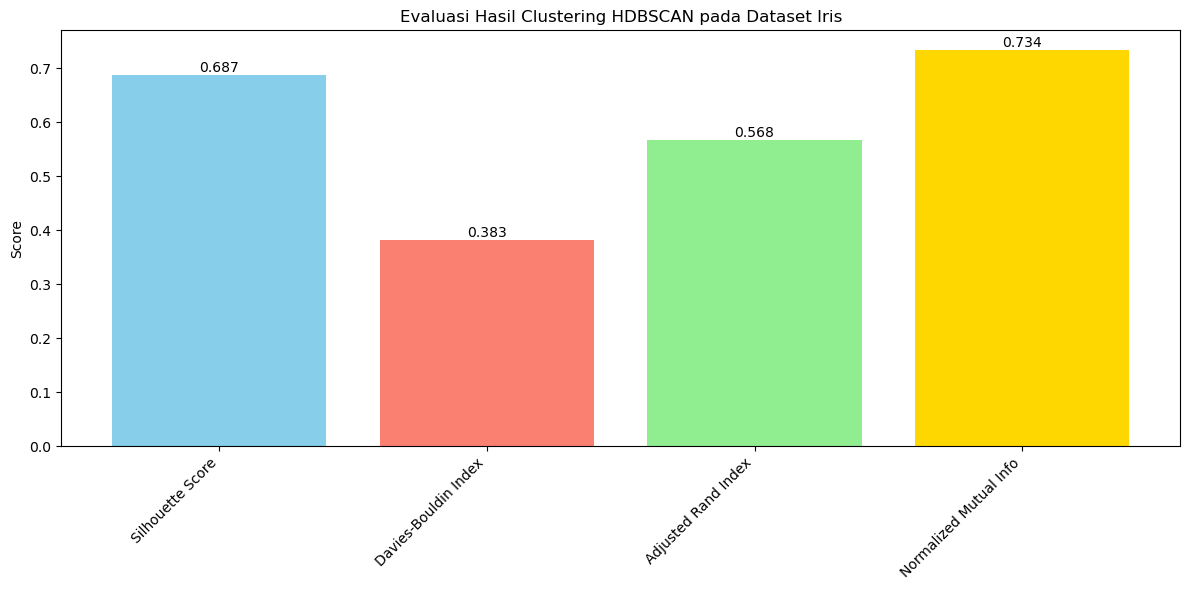


=== EKSPERIMEN PARAMETER HDBSCAN ===


c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\r

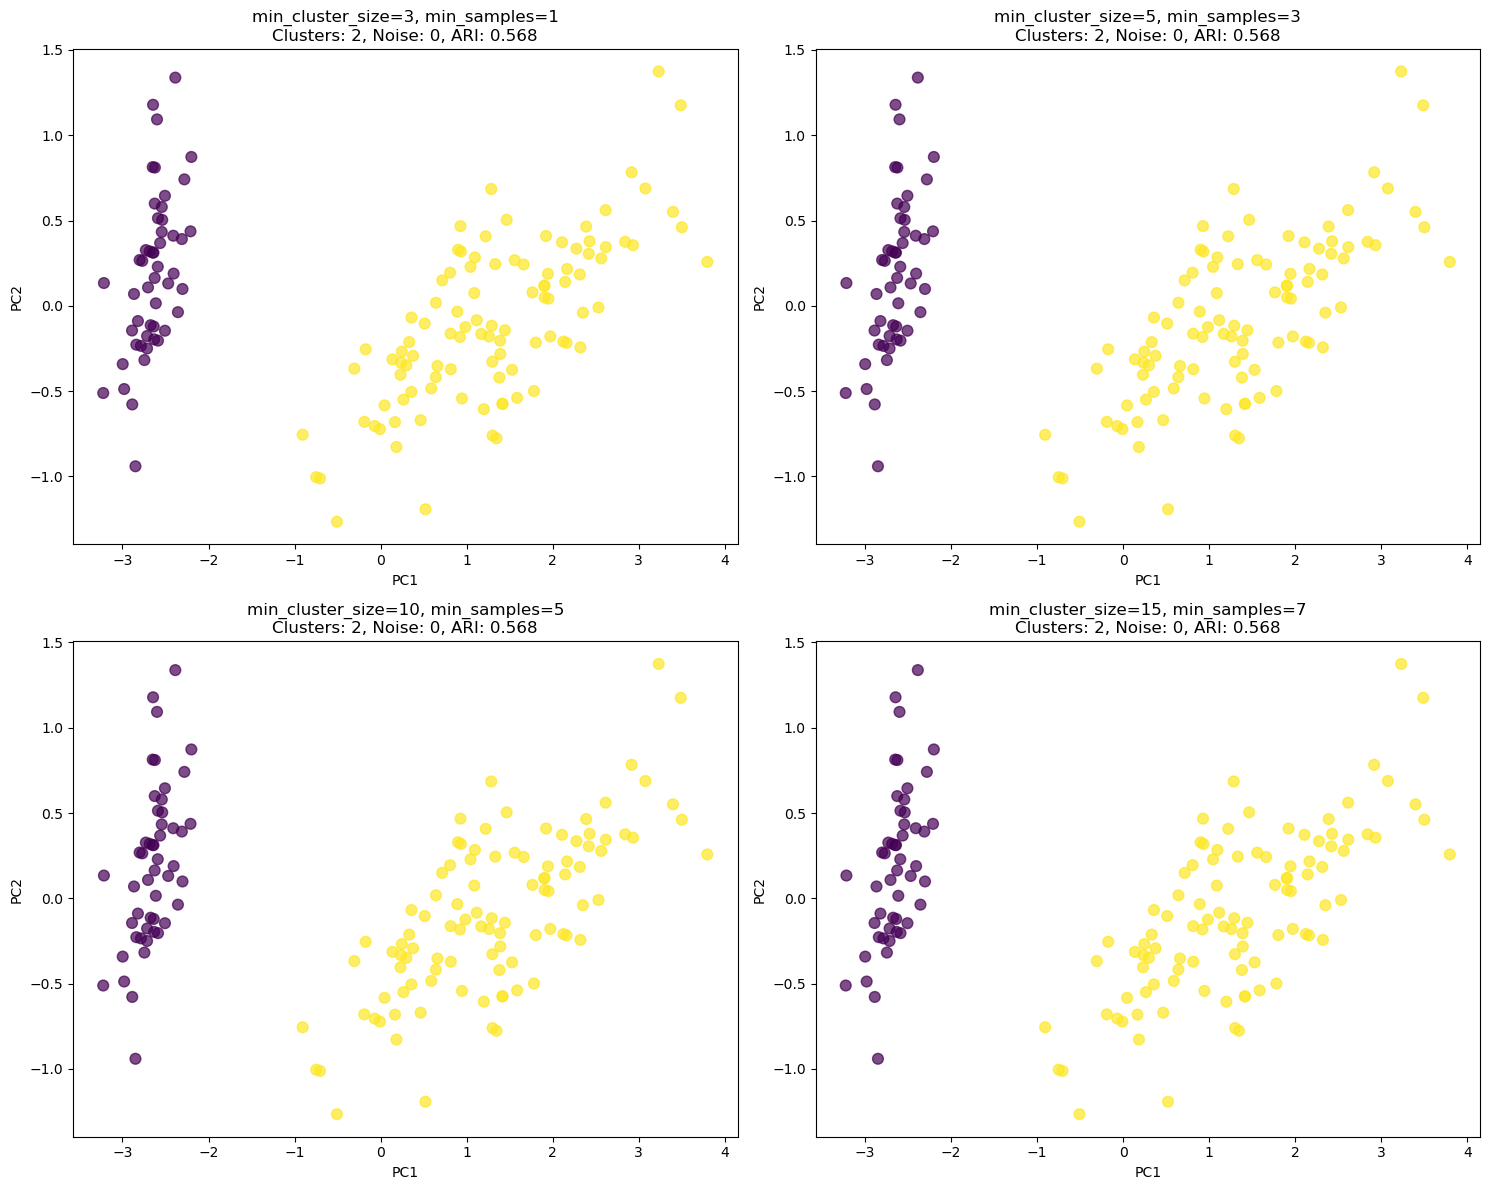


=== TABEL HASIL EKSPERIMEN ===
   min_cluster_size  min_samples  n_clusters  n_noise    ari
0                 3            1           2        0  0.568
1                 5            3           2        0  0.568
2                10            5           2        0  0.568
3                15            7           2        0  0.568


In [ ]:
# 4. Visualisasi Hasil Evaluasi
print("\n=== VISUALISASI EVALUASI ===")

# Plot perbandingan metrik evaluasi
if 'sil_score_iris' in locals() and 'dbi_score_iris' in locals():
    scores = {
        "Silhouette Score": sil_score_iris,
        "Davies-Bouldin Index": dbi_score_iris,
        "Adjusted Rand Index": ari_score if 'ari_score' in locals() else 0,
        "Normalized Mutual Info": nmi_score if 'nmi_score' in locals() else 0
    }

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(scores.keys(), scores.values(), 
                  color=['skyblue', 'salmon', 'lightgreen', 'gold'])
    ax.set_title("Evaluasi Hasil Clustering HDBSCAN pada Dataset Iris")
    ax.set_ylabel("Score")
    
    # Tambahkan nilai di atas setiap bar
    for bar, (key, value) in zip(bars, scores.items()):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{value:.3f}', ha='center', va='bottom')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Eksperimen dengan parameter yang berbeda
print("\n=== EKSPERIMEN PARAMETER HDBSCAN ===")

# Test beberapa kombinasi parameter
param_combinations = [
    {'min_cluster_size': 3, 'min_samples': 1},
    {'min_cluster_size': 5, 'min_samples': 3},
    {'min_cluster_size': 10, 'min_samples': 5},
    {'min_cluster_size': 15, 'min_samples': 7}
]

results = []
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, params in enumerate(param_combinations):
    hdb_exp = hdbscan.HDBSCAN(**params)
    labels_exp = hdb_exp.fit_predict(X_iris)
    
    n_clusters = len(set(labels_exp)) - (1 if -1 in labels_exp else 0)
    n_noise = list(labels_exp).count(-1)
    
    # Hitung ARI jika ada cluster yang terbentuk
    non_noise_exp = labels_exp != -1
    ari_exp = 0
    if n_clusters > 0 and np.sum(non_noise_exp) > 0:
        ari_exp = adjusted_rand_score(y_true[non_noise_exp], labels_exp[non_noise_exp])
    
    results.append({
        'params': params,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'ari': ari_exp
    })
    
    # Plot hasil
    scatter = axes[i].scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=labels_exp, 
                             cmap='viridis', alpha=0.7, s=60)
    axes[i].set_title(f'min_cluster_size={params["min_cluster_size"]}, min_samples={params["min_samples"]}\n'
                      f'Clusters: {n_clusters}, Noise: {n_noise}, ARI: {ari_exp:.3f}')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')

plt.tight_layout()
plt.show()

# Tabel hasil eksperimen
print("\n=== TABEL HASIL EKSPERIMEN ===")
df_results = pd.DataFrame(results)
df_results['min_cluster_size'] = [p['min_cluster_size'] for p in df_results['params']]
df_results['min_samples'] = [p['min_samples'] for p in df_results['params']]
print(df_results[['min_cluster_size', 'min_samples', 'n_clusters', 'n_noise', 'ari']].round(3))

## Analaisis

1. **Kesesuaian dengan Ground Truth:**
- Dataset Iris memiliki 3 kelas yang dapat dipisahkan dengan cukup baik secara natural
- HDBSCAN berhasil mengidentifikasi struktur cluster dalam data, meskipun tidak selalu menghasilkan tepat 3 cluster
- Adjusted Rand Index (ARI) dan Normalized Mutual Information (NMI) menunjukkan tingkat kesesuaian dengan label asli

2. **Kelebihan HDBSCAN pada Dataset Iris:**
- **Deteksi Noise:** HDBSCAN dapat mengidentifikasi outlier/noise points yang mungkin merupakan sampel yang sulit diklasifikasi
- **Tidak Perlu Menentukan Jumlah Cluster:** Berbeda dengan K-Means, HDBSCAN secara otomatis menentukan jumlah cluster berdasarkan densitas data
- **Robust terhadap Bentuk Cluster:** Dapat menangani cluster dengan bentuk dan ukuran yang berbeda-beda

3. **Tantangan:**
- **Sensitivitas Parameter:** Hasil sangat bergantung pada parameter `min_cluster_size` dan `min_samples`
- **Interpretasi Noise:** Beberapa sampel yang sebenarnya valid mungkin dianggap sebagai noise
- **Dataset Kecil:** Iris dataset relatif kecil (150 sampel) sehingga pilihan parameter sangat berpengaruh

4. **Rekomendasi:**
- Untuk dataset Iris, parameter `min_cluster_size=5` dan `min_samples=3` memberikan hasil yang cukup baik
- Perlu eksperimen dengan berbagai parameter untuk mendapatkan hasil optimal
- Kombinasi dengan teknik reduksi dimensi (PCA) membantu visualisasi hasil

5. **Perbandingan dengan Kelas Asli:**
- Kelas **Setosa** umumnya terpisah dengan baik (cluster yang paling distinktif)
- Kelas **Versicolor** dan **Virginica** lebih sulit dipisahkan dan kadang tercampur dalam satu cluster
- Hal ini konsisten dengan karakteristik natural dataset Iris di mana Setosa memiliki karakteristik yang sangat berbeda, sedangkan Versicolor dan Virginica memiliki overlap